<a href="https://colab.research.google.com/github/SoobinLee1/coding_exercise/blob/main/week1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **투빅스 15기 week1 EDA - 15기 이수빈**

In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn')
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 1. 데이터 불러오기

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
dat = pd.read_csv('/content/drive/MyDrive/tobigs/과제데이터.csv', encoding="UTF8")

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
dat.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
print('data shape: {}'.format(dat.shape))

data shape: (10886, 12)


# 2. 데이터

In [11]:
dat.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [36]:
dat.rename(columns={'casual':'non_registered'},inplace=True)
dat.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'non_registered', 'registered',
       'count'],
      dtype='object')

# 3. 범주형 변수 분석

범주형 변수는 season, holiday, workingday, weather로 각 변수를 확인해본다.

In [16]:
print('season: {}'.format(len(np.unique(dat.season))))
print('holiday: {}'.format(len(np.unique(dat.holiday))))
print('workingday: {}'.format(len(np.unique(dat.workingday))))
print('weather: {}'.format(len(np.unique(dat.weather))))

season: 4
holiday: 2
workingday: 2
weather: 4


holiday 칼럼의 경우, 1의 경우(공휴일을 가리킴) 개수가 현저히 적었다.

In [24]:
print('holiday: {}'.format(list(dat.holiday).count(1)))
print('not holiday: {}'.format(list(dat.holiday).count(0)))
print('workingday: {}'.format(list(dat.workingday).count(1)))
print('not workingday: {}'.format(list(dat.workingday).count(0)))

holiday: 311
not holiday: 10575
workingday: 7412
not workingday: 3474


# 4. 결측치 확인

In [25]:
dat.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [26]:
dat.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# 4. 수치형 변수 분석

수치형 변수 값들을 확인해보고 결측치나 이상치를 제거한다.

In [37]:
print(dat['temp'].unique())
print(dat['atemp'].unique())
print(dat['humidity'].unique())
print(dat['windspeed'].unique())
print(dat['non_registered'].unique())
print(dat['registered'].unique())

[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605 37.12  40.15  41.665 40.91  39.395 34.09  28.03  36.365
 37.88  42.425 43.94  38.635  1.515  0.76   2.275 43.18  44.695 45.455]
[ 81  80  75  86  76  77  72  82  88  87  94 100  71  66  57  46  42  39
  44  47  50  43  40  35  30  32  64  69  55  59  63  68  74  51  56  52
  49  48  37  33  28  38  36  93  29  53  34  54  41  45  92  62  58  61
  60  65  70  27  25  26  31  73  21  24  23  22  19  15

수치형 변수 이상치 확인 시, 이상치 데이터는 없어보인다.

In [55]:
num_att = ['temp','atemp','humidity','windspeed','count','non_registered','registered']
dat[num_att].describe()

,temp,atemp,humidity,windspeed,count,non_registered,registered
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,191.574132,36.021955,155.552177
std,7.79159,8.474601,19.245033,8.164537,181.144454,49.960477,151.039033
min,0.82000,0.760000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,42.000000,4.000000,36.000000
50%,20.50000,24.240000,62.000000,12.998000,145.000000,17.000000,118.000000
75%,26.24000,31.060000,77.000000,16.997900,284.000000,49.000000,222.000000
max,41.00000,45.455000,100.000000,56.996900,977.000000,367.000000,886.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86a92717b8>,
      dtype=object)

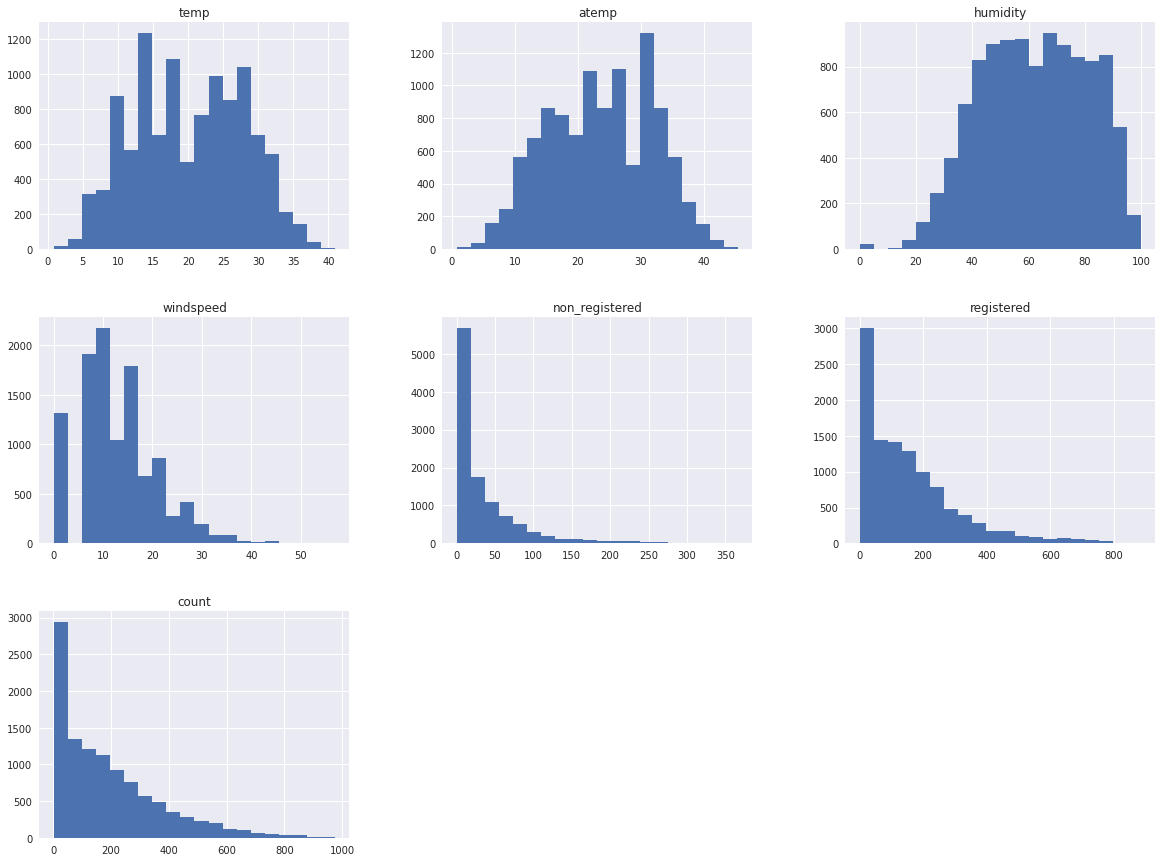

In [46]:
dat[num_att].hist(bins=20, figsize=(20,15))

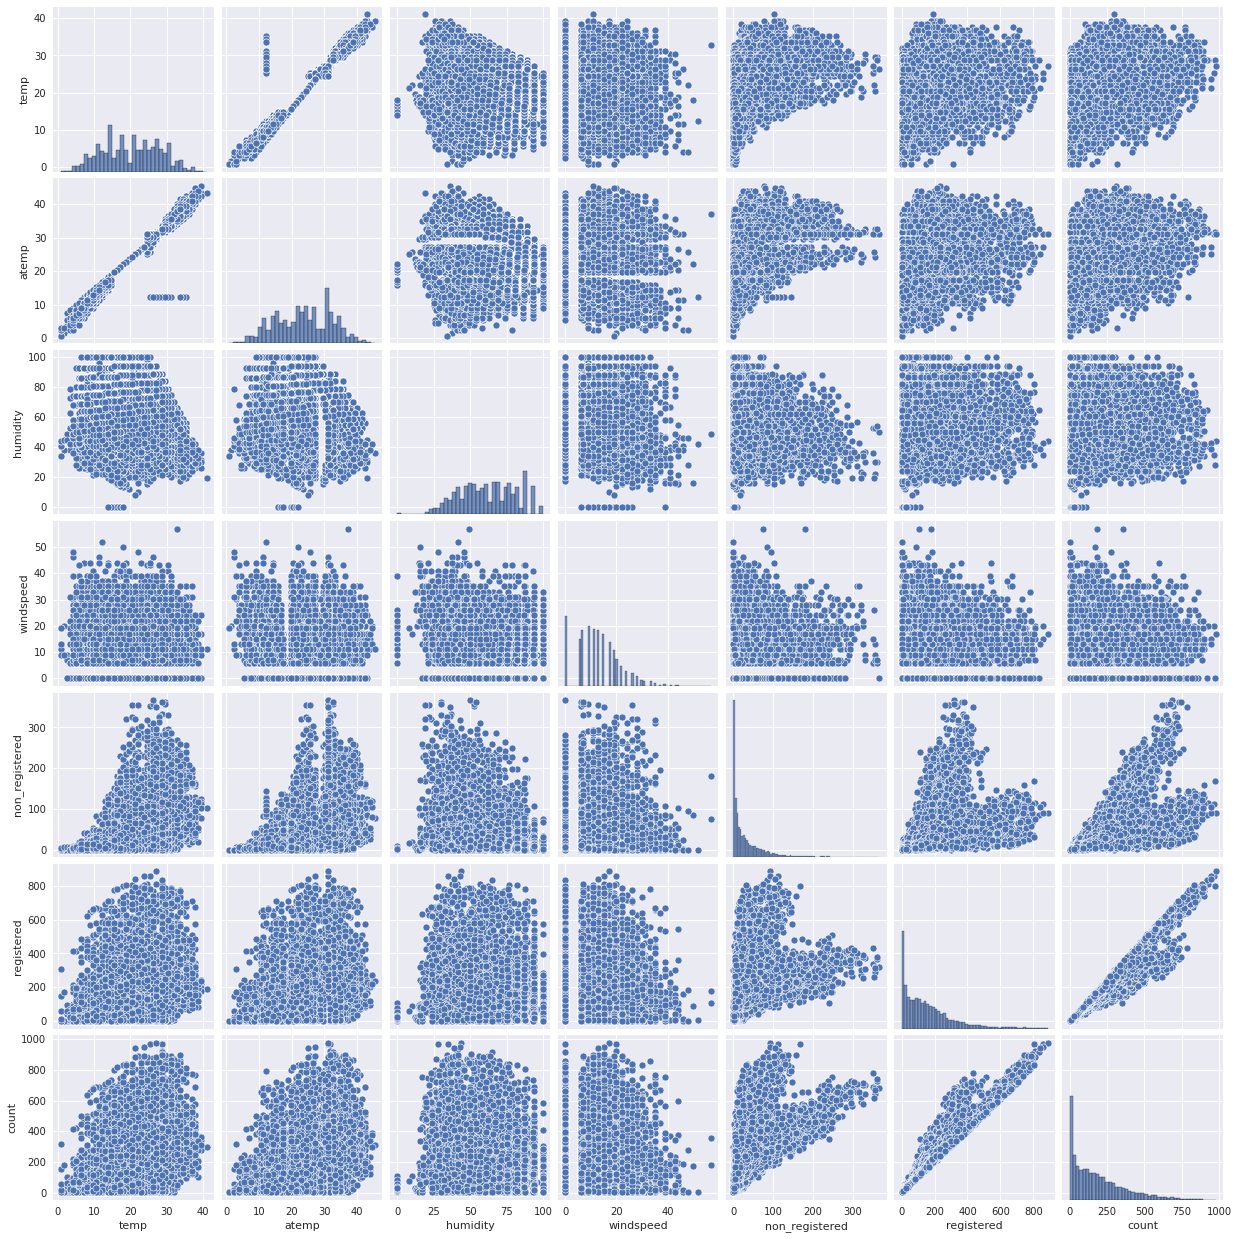

In [47]:
sns.pairplot(dat[num_att])

In [56]:
dat[num_att[:-2]].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


temp,atemp,humidity,windspeed 순으로 count와 상관관계가 있으며, 이중 humidity는 음의 상관관계를 갖는다.

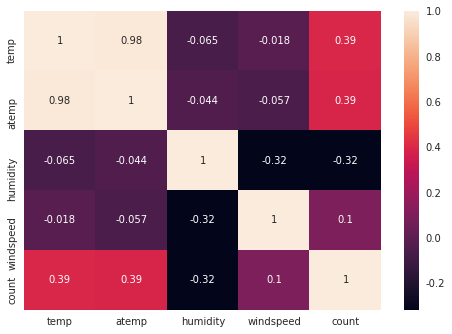

In [57]:
sns.heatmap(dat[num_att[:-2]].corr(),annot=True)
s plt.show()

# 수치형 변수에 대해 로그변환

데이터 분포를 봤을 때 한쪽으로 치우친 데이터가 존재한다. 따라서 우선적으로 모든 수치형 변수 'temp','atemp','humidity','windspeed','count','non_registered','registered'에 대하여 로그 변환을 진행해본다.

In [60]:
dat['log_temp']=np.log(dat['temp'])
dat['log_atemp']=np.log(dat['atemp'])
dat['log_windspeed']=np.log(dat['windspeed'])
dat['log_count']=np.log(dat['count'])
dat['log_non_registered']=np.log(dat['non_registered'])
dat['log_registered']=np.log(dat['registered'])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


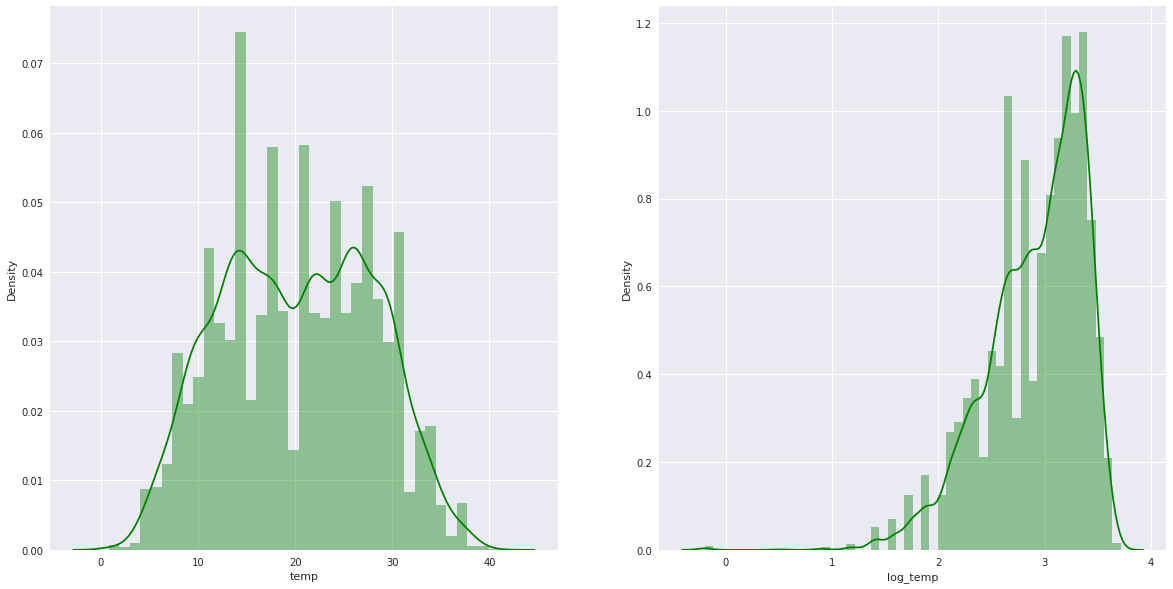

In [69]:
f, axes = plt.subplots(ncols=2, figsize=(20,10))
sns.distplot(dat['temp'],ax=axes[0],color='g')
sns.distplot(dat['log_temp'],ax=axes[1],color='g')
plt.show()

temp 변수를 로그변환시키면 오히려 정규분포 모양이 깨지게 된다. 따라서 로그 변환을 진행하지 않는 것으로 한다.

마찬가지로 atemp 변수를 로그변환시키면 오히려 정규분포 모양이 깨지게 된다. 따라서 로그 변환을 진행하지 않는 것으로 한다.

windspeed의 경우 로그 변환 시, -inf값이 다수
생기게 된다. 따라서 로그변환을 진행하지 않기로 한다.

In [82]:
list(dat['log_windspeed']).count(float('-inf'))

1313

count, non_registered, registerd 컬럼에 대하여 로그 변환을 진행하는 것으로 한다.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

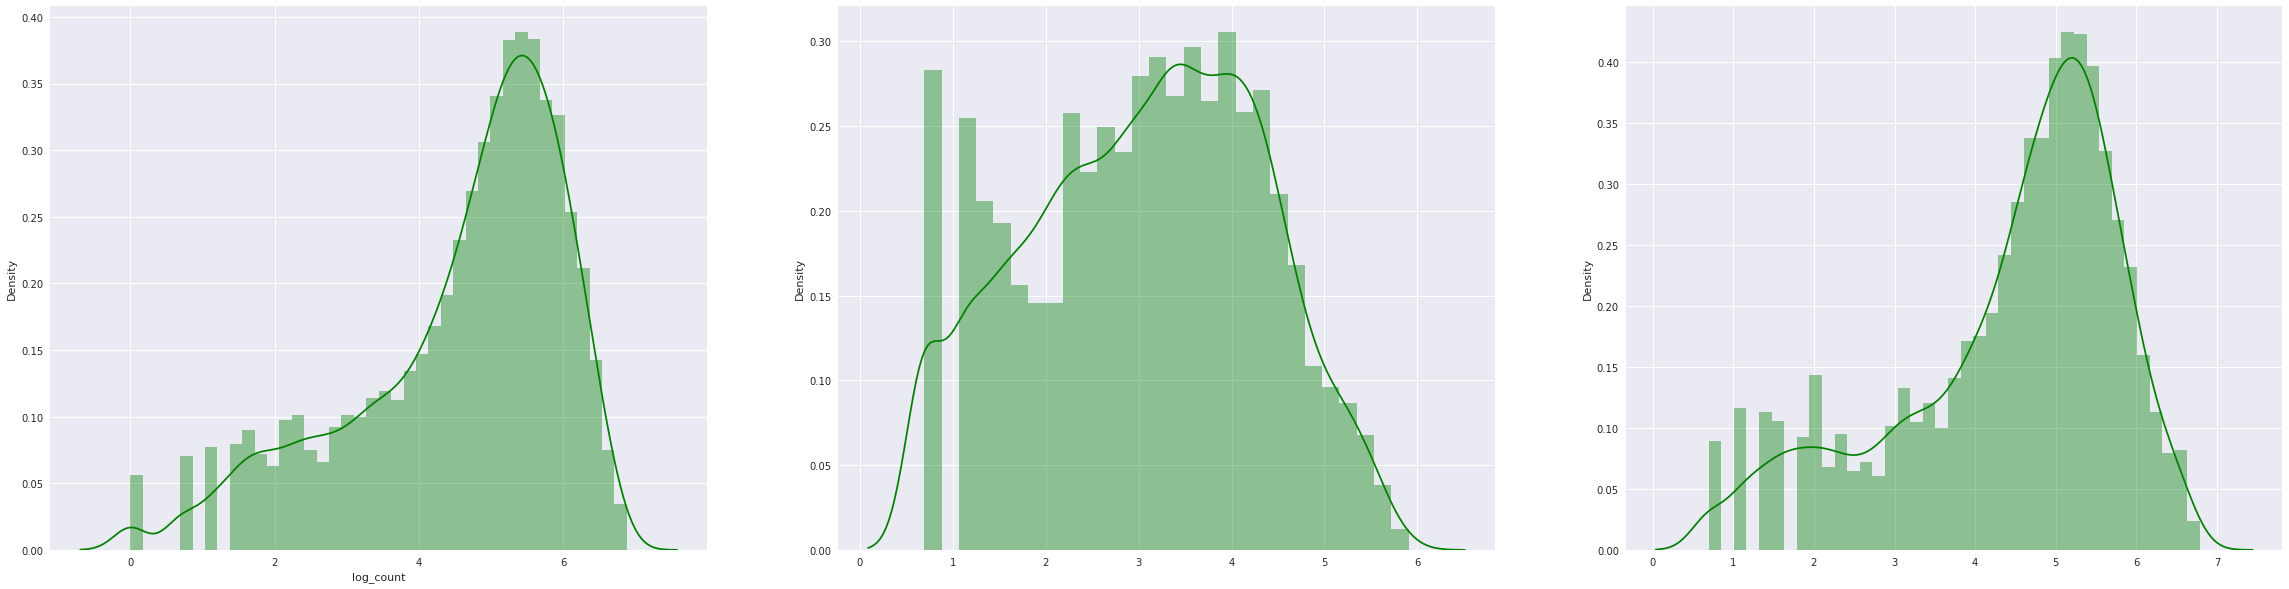

In [93]:
f, axes = plt.subplots(ncols=3, figsize=(40,10))
sns.distplot(dat['log_count'],ax=axes[0],color='g')
sns.distplot([x for x in dat['log_non_registered'] if x>0],ax=axes[1],color='g')
sns.distplot([x for x in dat['log_registered'] if x>0],ax=axes[2],color='g')
plt.show()

# 날씨 별 분석



In [115]:
dat['weather'].unique()

array([1, 2, 3, 4])

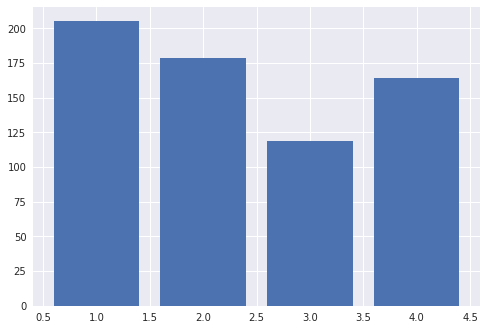

In [116]:
weather_case = dat.groupby(['weather'],as_index=False).mean()
weather_case
plt.bar(weather_case['weather'],weather_case['count'])
plt.show()

자전거 대여량은 **1-2-4-3**으로 많다.

# 계절별 분석

In [98]:
dat['temp'].unique()

array([1, 2, 3, 4])

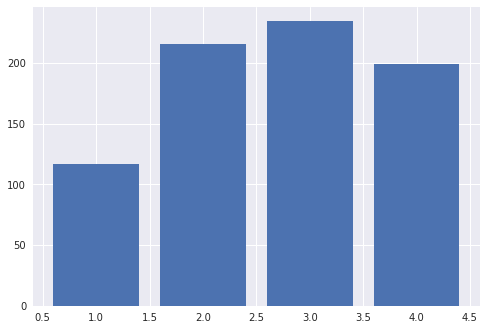

In [117]:
season_case_count = dat.groupby(['season'],as_index=False).mean()
plt.bar(season_case_count['season'],season_case_count['count'])
plt.show()

자전거 대여량은 가을-여름-겨울-봄 순으로 높았다.

# 기온별 분석

In [118]:
from sklearn.linear_model import LinearRegression

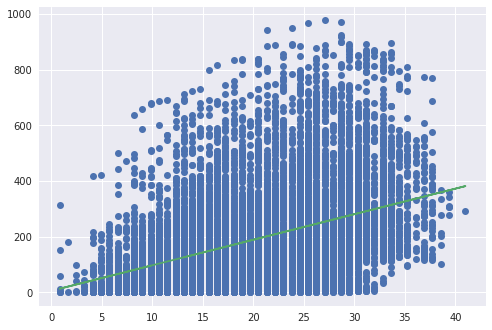

In [122]:
linear = LinearRegression()
linear.fit(dat['temp'].values.reshape(-1,1),dat['count'])
plt.plot(dat['temp'].values,dat['count'].values,'o')
plt.plot(dat['temp'],linear.predict(dat['temp'].values.reshape(-1,1),))

기온이 높을수록 대여량이 많아지는 현상을 보인다.

## Summary


*   feature1 =log_count
*   feature2 = log_non_registered
*   feature3 = log_registered

: 정규분포로 근사시키기 위해 log transform을 적용하였다.

*   feature4 = 날씨(weather)별 대여량
*   feature5 = 계절(season)별 대여량
*   feature6 = 기온(temp)별 대여량




